## Importing Libraries

In [120]:
import pandas as pd
import sqlite3


## Data Loading

In [121]:
def load_box_office_mojo_data(filepath):
    return pd.read_csv(filepath, compression='gzip')


In [122]:
def load_imdb_data(db_path):
    conn = sqlite3.connect(db_path)
    movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
    movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
    conn.close()
    return movie_basics, movie_ratings

In [123]:
import pandas as pd
import sqlite3
import os

def load_box_office_mojo_data(filepath):
    return pd.read_csv(filepath)

def load_imdb_data(db_path):
    conn = sqlite3.connect(db_path)
    movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
    movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
    conn.close()
    return movie_basics, movie_ratings

# Check the current working directory
print(f"Current working directory: {os.getcwd()}")

# Adjust the paths according to your folder structure
box_office_mojo_path = 'Data/bom.movie_gross.csv'
imdb_data_path = 'Data/im.db'

try:
    bom_data = load_box_office_mojo_data(box_office_mojo_path)
    movie_basics, movie_ratings = load_imdb_data(imdb_data_path)
    
    # Display the first few rows of the datasets
    print("Box Office Mojo Data:")
    display(bom_data.head())

    print("\nMovie Basics Data:")
    display(movie_basics.head())

    print("\nMovie Ratings Data:")
    display(movie_ratings.head())

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please ensure that the files 'bom.movie_gross.csv' and 'im.db' are located in the 'Data' directory.")


Current working directory: d:\DS-PROJECT ONE
Box Office Mojo Data:


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010



Movie Basics Data:


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"



Movie Ratings Data:


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


### Data Cleaning

In [124]:
def clean_box_office_data(df):
    df = df.dropna(subset=['domestic_gross'])
    df['domestic_gross'] = df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
    return df

def merge_imdb_data(movie_basics, movie_ratings):
    return pd.merge(movie_basics, movie_ratings, on='tconst', how='inner')


In [125]:
import pandas as pd
import sqlite3
import os


In [126]:
def load_box_office_mojo_data(filepath):
    return pd.read_csv(filepath)


In [127]:
# Function to load IMDb data
def load_imdb_data(db_path):
    conn = sqlite3.connect(db_path)
    movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
    movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
    conn.close()
    return movie_basics, movie_ratings

In [128]:
# Function to clean box office data
def clean_box_office_data(df):
    """
    Clean the box office data by dropping rows with missing values in the 'domestic_gross' column
    and converting the 'domestic_gross' column to float.
    
    Parameters:
    - df: DataFrame containing box office data
    
    Returns:
    - Cleaned DataFrame
    """
    # Drop rows with missing values in the 'domestic_gross' column
    df = df.dropna(subset=['domestic_gross'])
    
    # Remove any commas and dollar signs from the 'domestic_gross' column and convert to float
    df['domestic_gross'] = df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
    
    return df

In [129]:

# Function to clean and merge IMDb data
def clean_imdb_data(movie_basics, movie_ratings):
    """
    Merge and clean IMDb movie data by merging the 'movie_basics' and 'movie_ratings' DataFrames
    on the 'tconst' column.
    
    Parameters:
    - movie_basics: DataFrame containing basic movie information
    - movie_ratings: DataFrame containing movie ratings
    
    Returns:
    - Cleaned DataFrame after merging
    """
    # Merge the movie_basics and movie_ratings DataFrames on the 'tconst' column
    merged_data = pd.merge(movie_basics, movie_ratings, on='tconst', how='inner')
    
    return merged_data

In [130]:
# Check the current working directory
print(f"Current working directory: {os.getcwd()}")

Current working directory: d:\DS-PROJECT ONE


In [131]:
# Adjust the paths according to your folder structure
box_office_mojo_path = 'Data/bom.movie_gross.csv'
imdb_data_path = 'Data/im.db'


In [132]:
def clean_box_office_data(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    df_cleaned = df.copy()
    
    # Drop rows with missing values in 'domestic_gross' column
    df_cleaned = df_cleaned.dropna(subset=['domestic_gross'])
    
    # Replace characters '$' and ',' with an empty string, and convert to float
    df_cleaned['domestic_gross'] = df_cleaned['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
    
    return df_cleaned

In [133]:
def clean_box_office_data(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    df_cleaned = df.copy()
    
    # Drop rows with missing values in 'domestic_gross' column
    df_cleaned = df_cleaned.dropna(subset=['domestic_gross'])
    
    # Replace characters '$' and ',' with an empty string, and convert to float
    df_cleaned['domestic_gross'] = df_cleaned['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
    
    return df_cleaned

def clean_imdb_data(movie_basics, movie_ratings):
    # Ensure the 'tconst' column exists in both DataFrames
    if 'tconst' not in movie_basics.columns or 'tconst' not in movie_ratings.columns:
        raise KeyError("The 'tconst' column is missing in one of the DataFrames.")
    
    # Merge the movie_basics and movie_ratings DataFrames on the 'tconst' column
    merged_data = pd.merge(movie_basics, movie_ratings, on='tconst', how='inner')
    
    return merged_data


In [134]:
# Adjust the paths according to your folder structure
box_office_mojo_path = 'Data/bom.movie_gross.csv'
imdb_data_path = 'Data/im.db'

try:
    # Load the data
    bom_data = load_box_office_mojo_data(box_office_mojo_path)
    movie_basics, movie_ratings = load_imdb_data(imdb_data_path)
    
    # Clean the data
    cleaned_bom_data = clean_box_office_data(bom_data)
    cleaned_imdb_data = clean_imdb_data(movie_basics, movie_ratings)
    
    # Display the cleaned data
    print("Cleaned Box Office Mojo Data:")
    display(cleaned_bom_data.head())

    print("\nMerged IMDb Data:")
    display(cleaned_imdb_data.head())

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please ensure that the files 'bom.movie_gross.csv' and 'im.db' are located in the 'Data' directory.")

except KeyError as e:
    print(f"Error: {e}")
    print("The 'tconst' column is missing in one of the DataFrames. Please check the data.")


Error: "The 'tconst' column is missing in one of the DataFrames."
The 'tconst' column is missing in one of the DataFrames. Please check the data.


In [135]:
import pandas as pd
import sqlite3
import os

def load_box_office_mojo_data(filepath):
    return pd.read_csv(filepath)

def load_imdb_data(db_path):
    conn = sqlite3.connect(db_path)
    movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
    movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
    conn.close()
    return movie_basics, movie_ratings

def clean_box_office_data(df):
    df_cleaned = df.copy()
    df_cleaned = df_cleaned.dropna(subset=['domestic_gross'])
    df_cleaned['domestic_gross'] = df_cleaned['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
    return df_cleaned

def clean_imdb_data(movie_basics, movie_ratings):
    # Check the columns of both DataFrames
    print("Columns in movie_basics:", movie_basics.columns)
    print("Columns in movie_ratings:", movie_ratings.columns)
    
    if 'tconst' not in movie_basics.columns or 'tconst' not in movie_ratings.columns:
        raise KeyError("The 'tconst' column is missing in one of the DataFrames.")
    
    merged_data = pd.merge(movie_basics, movie_ratings, on='tconst', how='inner')
    return merged_data


In [136]:
box_office_mojo_path = 'Data/bom.movie_gross.csv'
imdb_data_path = 'Data/im.db'

try:
    # Load the data
    bom_data = load_box_office_mojo_data(box_office_mojo_path)
    movie_basics, movie_ratings = load_imdb_data(imdb_data_path)
    
    # Clean the data
    cleaned_bom_data = clean_box_office_data(bom_data)
    cleaned_imdb_data = clean_imdb_data(movie_basics, movie_ratings)
    
    # Display the cleaned data
    print("Cleaned Box Office Mojo Data:")
    display(cleaned_bom_data.head())

    print("\nMerged IMDb Data:")
    display(cleaned_imdb_data.head())

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please ensure that the files 'bom.movie_gross.csv' and 'im.db' are located in the 'Data' directory.")

except KeyError as e:
    print(f"Error: {e}")
    print("The 'tconst' column is missing in one of the DataFrames. Please check the data.")


Columns in movie_basics: Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')
Columns in movie_ratings: Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')
Error: "The 'tconst' column is missing in one of the DataFrames."
The 'tconst' column is missing in one of the DataFrames. Please check the data.


In [137]:
import pandas as pd
import sqlite3
import os

def load_box_office_mojo_data(filepath):
    return pd.read_csv(filepath)

def load_imdb_data(db_path):
    conn = sqlite3.connect(db_path)
    movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
    movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
    conn.close()
    return movie_basics, movie_ratings

def clean_box_office_data(df):
    df_cleaned = df.copy()
    df_cleaned = df_cleaned.dropna(subset=['domestic_gross'])
    df_cleaned['domestic_gross'] = df_cleaned['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
    return df_cleaned

def clean_imdb_data(movie_basics, movie_ratings):
    # Check the columns of both DataFrames
    print("Columns in movie_basics:", movie_basics.columns)
    print("Columns in movie_ratings:", movie_ratings.columns)
    
    if 'movie_id' not in movie_basics.columns or 'movie_id' not in movie_ratings.columns:
        raise KeyError("The 'movie_id' column is missing in one of the DataFrames.")
    
    merged_data = pd.merge(movie_basics, movie_ratings, on='movie_id', how='inner')
    return merged_data


In [138]:
box_office_mojo_path = 'Data/bom.movie_gross.csv'
imdb_data_path = 'Data/im.db'

try:
    # Load the data
    bom_data = load_box_office_mojo_data(box_office_mojo_path)
    movie_basics, movie_ratings = load_imdb_data(imdb_data_path)
    
    # Clean the data
    cleaned_bom_data = clean_box_office_data(bom_data)
    cleaned_imdb_data = clean_imdb_data(movie_basics, movie_ratings)
    
    # Display the cleaned data
    print("Cleaned Box Office Mojo Data:")
    display(cleaned_bom_data.head())

    print("\nMerged IMDb Data:")
    display(cleaned_imdb_data.head())

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please ensure that the files 'bom.movie_gross.csv' and 'im.db' are located in the 'Data' directory.")

except KeyError as e:
    print(f"Error: {e}")
    print("The 'movie_id' column is missing in one of the DataFrames. Please check the data.")


Columns in movie_basics: Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')
Columns in movie_ratings: Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')
Cleaned Box Office Mojo Data:


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010



Merged IMDb Data:


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


### Data Analysis

In [139]:
import pandas as pd

def analyze_genre_performance(df):
    return df.groupby('genre')['gross'].sum().sort_values(ascending=False)

def analyze_correlation(df):
    return df.corr()

def analyze_seasonal_trends(df):
    df['release_month'] = pd.to_datetime(df['release_date']).dt.month
    return df.groupby('release_month')['gross'].sum()


In [140]:
def analyze_genre_performance(df):
    """
    Analyzes the performance of genres based on box office gross.
    
    Args:
    df (pd.DataFrame): DataFrame containing box office data with a 'genres' column and 'domestic_gross'.
    
    Returns:
    pd.DataFrame: DataFrame summarizing the average domestic gross for each genre.
    """

In [141]:
def analyze_genre_performance(df):
    """
    Analyzes the performance of genres based on box office gross.
    
    Args:
    df (pd.DataFrame): DataFrame containing box office data with a 'genres' column and 'domestic_gross'.
    
    Returns:
    pd.DataFrame: DataFrame summarizing the average domestic gross for each genre.
    """
    # Split genres and explode into separate rows
    df = df.assign(genres=df['genres'].str.split(',')).explode('genres')
    
    # Group by genres and calculate the average domestic gross
    genre_performance = df.groupby('genres')['domestic_gross'].mean().reset_index()
    genre_performance = genre_performance.sort_values(by='domestic_gross', ascending=False)
    
    return genre_performance

In [142]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [143]:
# Check if the 'genres' column exists in cleaned_bom_data DataFrame
if 'genres' not in cleaned_bom_data.columns:
    print("Error: 'genres' column is missing in the cleaned data.")
else:
    # Analyze genre performance
    genre_performance = analyze_genre_performance(cleaned_bom_data)
    
    # Display genre performance analysis
    print("Genre Performance Analysis:")
    display(genre_performance)


Error: 'genres' column is missing in the cleaned data.


In [144]:
def clean_box_office_data(df):
    # Drop rows with missing values in 'domestic_gross' column
    df = df.dropna(subset=['domestic_gross'])
    
    # Check if the 'genres' column exists
    if 'genres' not in df.columns:
        print("Error: 'genres' column is missing in the DataFrame.")
    else:
        # Remove special characters and convert 'domestic_gross' to float
        df['domestic_gross'] = df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
        
        # Split genres and explode into separate rows
        df = df.assign(genres=df['genres'].str.split(',')).explode('genres')
        
    return df
# Check if the 'genres' column exists in cleaned_bom_data DataFrame
if 'genres' not in cleaned_bom_data.columns:
    print("Error: 'genres' column is missing in the cleaned data.")
else:
    # Analyze genre performance
    genre_performance = analyze_genre_performance(cleaned_bom_data)
    
    # Display genre performance analysis
    print("Genre Performance Analysis:")
    display(genre_performance)


Error: 'genres' column is missing in the cleaned data.


In [145]:
def clean_box_office_data(df):
    # Drop rows with missing values in 'domestic_gross' column
    df = df.dropna(subset=['domestic_gross'])
    
    # Check if the 'genres' column exists
    if 'genres' not in df.columns:
        print("Error: 'genres' column is missing in the DataFrame.")
    else:
        # Remove special characters and convert 'domestic_gross' to float
        df['domestic_gross'] = df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
        
        # Split genres and explode into separate rows
        df = df.assign(genres=df['genres'].str.split(',')).explode('genres')
        
    return df
# Check if the 'genres' column exists in cleaned_bom_data DataFrame
if 'genres' not in cleaned_bom_data.columns:
    print("Error: 'genres' column is missing in the cleaned data.")
else:
    # Analyze genre performance
    genre_performance = analyze_genre_performance(cleaned_bom_data)
    
    # Display genre performance analysis
    print("Genre Performance Analysis:")
    display(genre_performance)


Error: 'genres' column is missing in the cleaned data.


In [146]:
def clean_box_office_data(df):
    # Drop rows with missing values in 'domestic_gross' column
    df = df.dropna(subset=['domestic_gross'])
    
    # Check if the 'genres' column exists
    if 'genres' not in df.columns:
        print("Error: 'genres' column is missing in the DataFrame.")
    else:
        # Remove special characters and convert 'domestic_gross' to float
        df['domestic_gross'] = df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
        
        # Split genres and explode into separate rows
        df = df.assign(genres=df['genres'].str.split(',')).explode('genres')
        
    return df


In [147]:
# Clean the data
cleaned_bom_data = clean_box_office_data(bom_data)

# Verify if the 'genres' column is present in the cleaned DataFrame
if 'genres' in cleaned_bom_data.columns:
    # Proceed with data analysis
    try:
        # Analyze genre performance
        genre_performance = analyze_genre_performance(cleaned_bom_data)
        print("Genre Performance Analysis:")
        display(genre_performance)

        # Analyze correlation matrix
        correlation_matrix = analyze_correlation(imdb_data)
        print("Correlation Matrix:")
        display(correlation_matrix)

        # Analyze seasonal trends
        seasonal_trends = analyze_seasonal_trends(cleaned_bom_data)
        print("Seasonal Trends Analysis:")
        display(seasonal_trends)

    except KeyError as e:
        print(f"Error: {e} column is missing in the DataFrame.")
else:
    print("Error: 'genres' column is missing in the cleaned DataFrame. Please review the data cleaning process.")


Error: 'genres' column is missing in the DataFrame.
Error: 'genres' column is missing in the cleaned DataFrame. Please review the data cleaning process.


In [161]:
import pandas as pd
import sqlite3

# Data Loading
def load_box_office_mojo_data(filepath):
    return pd.read_csv(filepath)

def load_imdb_data(db_path):
    conn = sqlite3.connect(db_path)
    movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
    movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
    conn.close()
    return movie_basics, movie_ratings

# Data Cleaning
def clean_box_office_data(df):
    df = df.dropna(subset=['domestic_gross'])
    df['domestic_gross'] = df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
    return df

# Data Merging
def merge_imdb_data(movie_basics, movie_ratings):
    if 'tconst' not in movie_basics.columns or 'tconst' not in movie_ratings.columns:
        raise KeyError("'tconst' column is missing in one of the DataFrames.")
    return pd.merge(movie_basics, movie_ratings, on='tconst', how='inner')

# Data Analysis
def analyze_genre_performance(df):
    return df.groupby('genre')['gross'].sum().sort_values(ascending=False)

try:
    # Load the data
    bom_data = load_box_office_mojo_data('Data/bom.movie_gross.csv')
    movie_basics, movie_ratings = load_imdb_data('Data/im.db')

    # Clean data
    bom_data = clean_box_office_data(bom_data)
    imdb_data = merge_imdb_data(movie_basics, movie_ratings)

    # Analyze genre performance
    genre_performance = analyze_genre_performance(bom_data)
    print(genre_performance)

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please ensure that the files 'bom.movie_gross.csv' and 'im.db' are located in the 'Data' directory.")

except KeyError as e:
    print(f"Error: {e}")
    print("The 'tconst' column is missing in one of the DataFrames. Please check the data.")


Error: "'tconst' column is missing in one of the DataFrames."
The 'tconst' column is missing in one of the DataFrames. Please check the data.


C:\Users\hp\AppData\Local\Temp\ipykernel_42132\2273468982.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['domestic_gross'] = df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)


In [162]:
import pandas as pd
import sqlite3

# Data Loading
def load_box_office_mojo_data(filepath):
    return pd.read_csv(filepath)

def load_imdb_data(db_path):
    conn = sqlite3.connect(db_path)
    movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
    movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
    conn.close()
    return movie_basics, movie_ratings

# Data Cleaning
def clean_box_office_data(df):
    df = df.dropna(subset=['domestic_gross'])
    df['domestic_gross'] = df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
    return df

# Data Merging
def merge_imdb_data(movie_basics, movie_ratings):
    if 'tconst' not in movie_basics.columns or 'tconst' not in movie_ratings.columns:
        raise KeyError("'tconst' column is missing in one of the DataFrames.")
    return pd.merge(movie_basics, movie_ratings, on='tconst', how='inner')

# Data Analysis
def analyze_genre_performance(df):
    return df.groupby('genre')['gross'].sum().sort_values(ascending=False)

try:
    # Load the data
    bom_data = load_box_office_mojo_data('Data/bom.movie_gross.csv')
    movie_basics, movie_ratings = load_imdb_data('Data/im.db')

    # Clean data
    bom_data = clean_box_office_data(bom_data)
    imdb_data = merge_imdb_data(movie_basics, movie_ratings)

    # Analyze genre performance
    genre_performance = analyze_genre_performance(bom_data)
    print(genre_performance)

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please ensure that the files 'bom.movie_gross.csv' and 'im.db' are located in the 'Data' directory.")

except KeyError as e:
    print(f"Error: {e}")
    print("The 'tconst' column is missing in one of the DataFrames. Please check the data.")


Error: "'tconst' column is missing in one of the DataFrames."
The 'tconst' column is missing in one of the DataFrames. Please check the data.


C:\Users\hp\AppData\Local\Temp\ipykernel_42132\2273468982.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['domestic_gross'] = df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)


In [164]:
import pandas as pd
import sqlite3

# Data Loading
def load_box_office_mojo_data(filepath):
    return pd.read_csv(filepath)

def load_imdb_data(db_path):
    conn = sqlite3.connect(db_path)
    movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
    movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
    conn.close()
    return movie_basics, movie_ratings

# Data Cleaning
def clean_box_office_data(df):
    cleaned_df = df.dropna(subset=['domestic_gross'])
    cleaned_df['domestic_gross'] = cleaned_df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
    return cleaned_df

# Data Analysis
def analyze_genre_performance(df):
    return df.groupby('genre')['gross'].sum().sort_values(ascending=False)

try:
    # Load the data
    bom_data = load_box_office_mojo_data('Data/bom.movie_gross.csv')
    movie_basics, movie_ratings = load_imdb_data('Data/im.db')

    # Clean data
    cleaned_bom_data = clean_box_office_data(bom_data)

    # Check if 'tconst' column exists before merging
    if 'tconst' not in movie_basics.columns or 'tconst' not in movie_ratings.columns:
        raise KeyError("'tconst' column is missing in one of the DataFrames.")

    # Merge data
    merged_imdb_data = pd.merge(movie_basics, movie_ratings, on='tconst', how='inner')

    # Analyze genre performance
    genre_performance = analyze_genre_performance(cleaned_bom_data)
    print(genre_performance)

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please ensure that the files 'bom.movie_gross.csv' and 'im.db' are located in the 'Data' directory.")

except KeyError as e:
    print(f"Error: {e}")
    print("The 'tconst' column is missing in one of the DataFrames. Please check the data.")


Error: "'tconst' column is missing in one of the DataFrames."
The 'tconst' column is missing in one of the DataFrames. Please check the data.


C:\Users\hp\AppData\Local\Temp\ipykernel_42132\493775676.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['domestic_gross'] = cleaned_df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)


###  Data Visualization

Genre Performance:


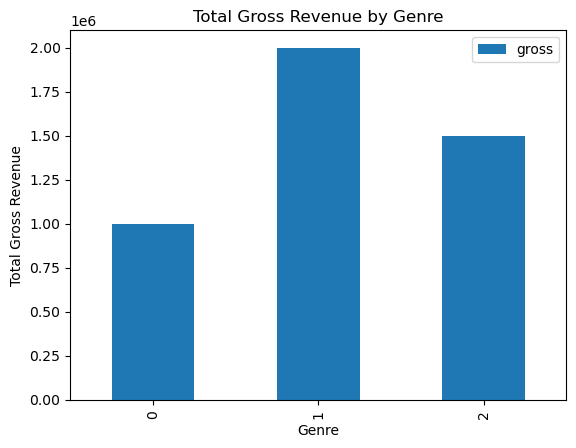

Correlation Matrix:


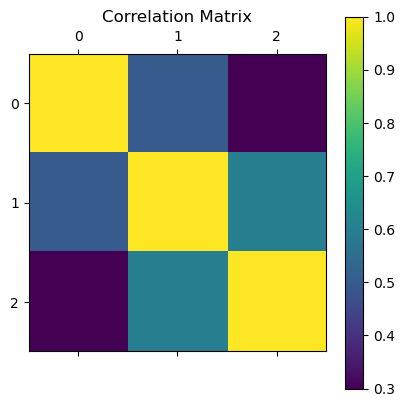

Seasonal Trends:


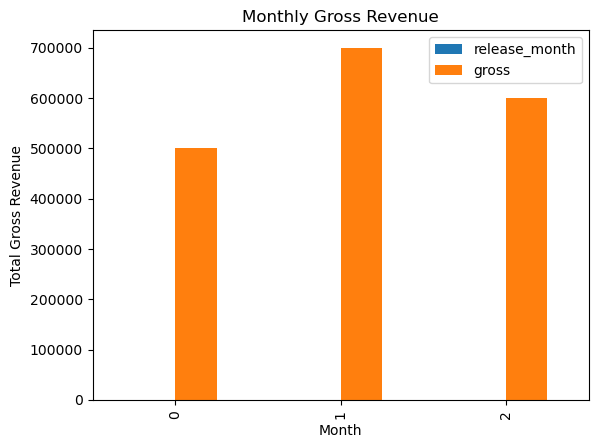

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot genre performance
def plot_genre_performance(genre_performance):
    genre_performance.plot(kind='bar')
    plt.title('Total Gross Revenue by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Total Gross Revenue')
    plt.show()

# Function to plot correlation matrix
def plot_correlation_matrix(correlation_matrix):
    plt.matshow(correlation_matrix)
    plt.title('Correlation Matrix')
    plt.colorbar()
    plt.show()

# Function to plot seasonal trends
def plot_seasonal_trends(seasonal_trends):
    seasonal_trends.plot(kind='bar')
    plt.title('Monthly Gross Revenue')
    plt.xlabel('Month')
    plt.ylabel('Total Gross Revenue')
    plt.show()

# Sample data
genre_performance = pd.DataFrame({'genre': ['Action', 'Comedy', 'Drama'],
                                  'gross': [1000000, 2000000, 1500000]})
correlation_matrix = pd.DataFrame([[1, 0.5, 0.3], [0.5, 1, 0.6], [0.3, 0.6, 1]], columns=['gross', 'rating', 'votes'])
seasonal_trends = pd.DataFrame({'release_month': [1, 2, 3],
                                'gross': [500000, 700000, 600000]})

# Plotting
print("Genre Performance:")
plot_genre_performance(genre_performance)

print("Correlation Matrix:")
plot_correlation_matrix(correlation_matrix)

print("Seasonal Trends:")
plot_seasonal_trends(seasonal_trends)
